# setup

In [ ]:
!pip install umap-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.7/85.7 kB 1.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 4.3 MB/s eta 0:00:00


In [ ]:
import pickle
import numpy as np

import umap
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# umap encoder weights

In [ ]:
# # Load the weight matrix from the uploaded pickle file
# with open('weight_matrix.pkl', 'rb') as f:
#     weight_matrix_np = pickle.load(f)

In [ ]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/weight_matrix.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    weight_matrix_np = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(weight_matrix_np.shape)

torch.Size([768, 24576])


In [ ]:
umap_model = umap.UMAP(n_components=2)
weight_matrix_umap = umap_model.fit_transform(weight_matrix_np)

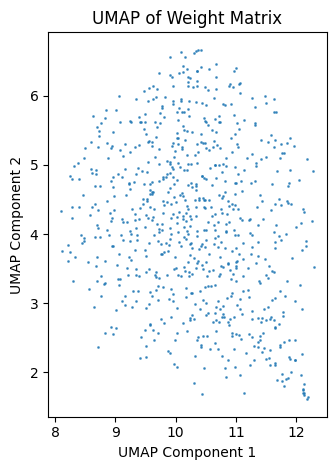

In [ ]:
plt.subplot(1, 2, 2)
plt.scatter(weight_matrix_umap[:, 0], weight_matrix_umap[:, 1], s=1, alpha=0.7)
plt.title('UMAP of Weight Matrix')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')

plt.tight_layout()
plt.show()

<ipython-input-10-5e4bd3119625>:9: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')


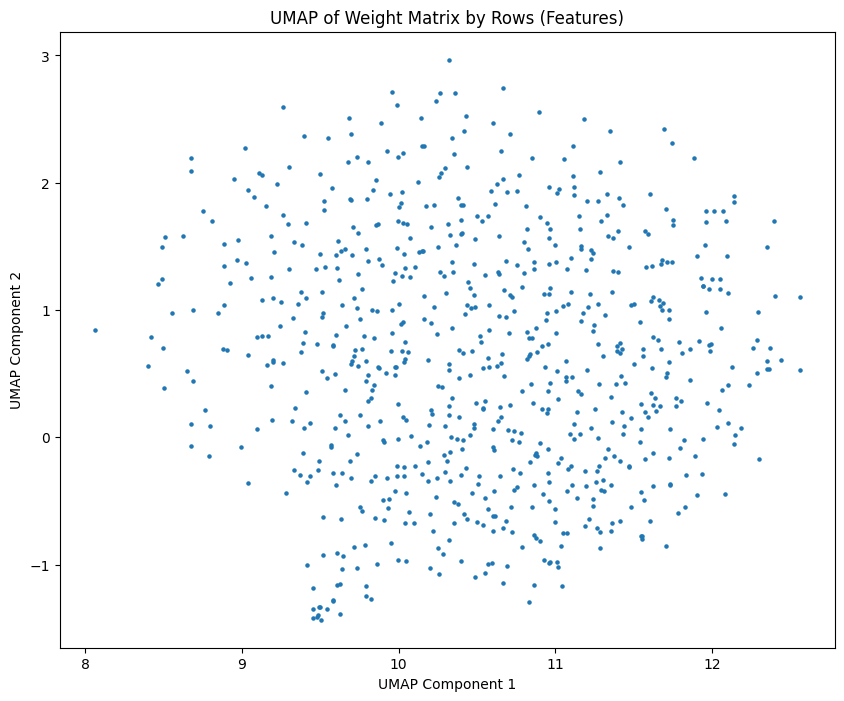

In [ ]:
# Initialize UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')

# Fit and transform the data by rows
embedding = reducer.fit_transform(weight_matrix_np)

# Plot the UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')
plt.title('UMAP of Weight Matrix by Rows (Features)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()


# umap feature actvs

In [ ]:
# Define the path to your pickle file in Google Drive
file_path = '/content/drive/MyDrive/feature_acts.pkl'  # Change the path if necessary

# Load the weight matrix from the pickle file
with open(file_path, 'rb') as f:
    feature_acts = pickle.load(f)

# Optionally, check the shape of the loaded weight matrix
print(feature_acts.shape)

torch.Size([32, 128, 24576])


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
<ipython-input-7-f0edf7253fc4>:11: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')


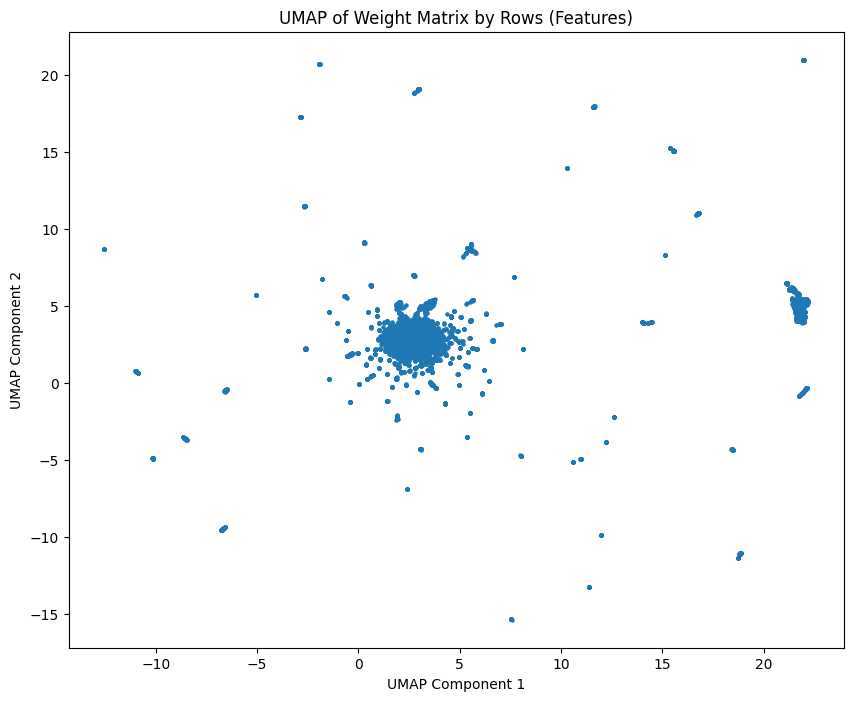

In [ ]:
reshaped_activations = feature_acts.reshape(32 * 128, 24576).cpu()

# Initialize UMAP
reducer = umap.UMAP(n_neighbors=15, min_dist=0.01, metric='euclidean')

# Fit and transform the data by rows
embedding = reducer.fit_transform(reshaped_activations)

# Plot the UMAP result
plt.figure(figsize=(10, 8))
plt.scatter(embedding[:, 0], embedding[:, 1], s=5, cmap='Spectral')
plt.title('UMAP of Weight Matrix by Rows (Features)')
plt.xlabel('UMAP Component 1')
plt.ylabel('UMAP Component 2')
plt.show()